## Problem statement: 

The sales team want to enhance their marketing strategies by exploring into their historical marketing promotion data. This dataset includes information on TV, social media, radio, and influencer promotions undertaken by the business to boost its sales.  

The objective of this notebook is to pinpoint a combination of independent variables that significantly influence the company sales. It require data exploration and cleaning, the use of plots and descriptive statistics to select relevant independent variables for the creation of a fitting model. 

Subsequently, the focus will be on the creation of a well-fitting model that illustrate the intricate relationships between the chosen variables, offering valuable insights into their collective influence on sales outcomes.

## Dataset and its description

The dataset, named `marketing_sales_data.csv`, contains information about sales that experience a boost in sales following  expenditures on advertising campaigns across various channels, including TV, radio, social media, and influencer marketing. 

The features in the dataset are:

* `TV` - Promotional budget for TV (it is categorized as Low, Medium and High).
* `Radio` - Promotional budget for Radio (expressed in million USD).
* `Social Media` - Promotional budget on Social media (expressed in million USD).
* `Influencer` - Promotional budget for Influencer based on the size ("Mega," "Macro," "Micro," and "Nano").
* `Sales` - Revenue generated after spending budget on promovation on various channel.

## Step 1: Import of Python libraries and dataset

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [131]:
#Load the data and display its fist 10 rows
data = pd.read_csv('marketing_sales_data.csv')
data.head(10)b

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


C:\Users\DevendiranDi\AppData\Local\anaconda3_Version2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


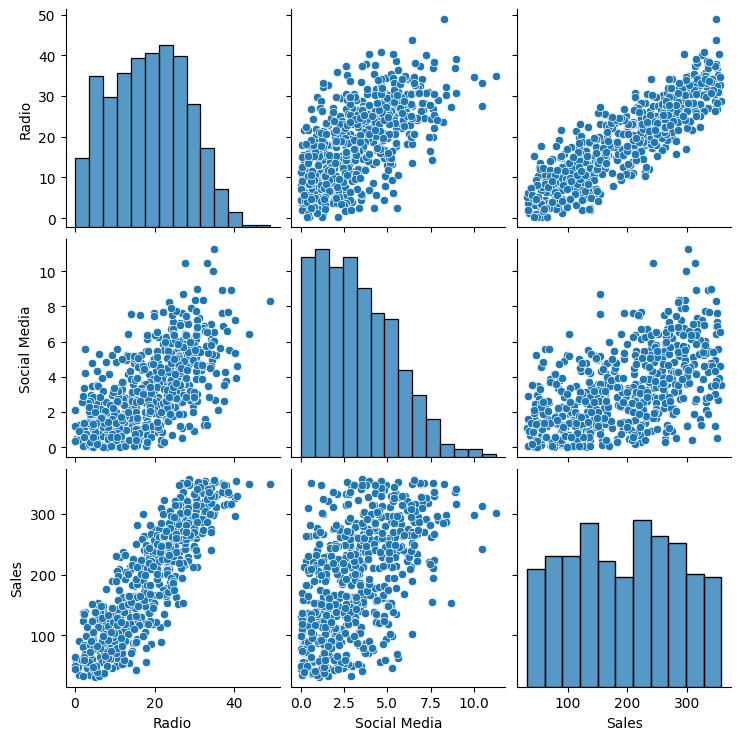

In [132]:
#Create a scatter plot to visualize the relationship between each variable in data

sns.pairplot(data)

**Observation:** It can be observed that the independent variable `Radio` and `Social Media` have a linear relationship with dependent variable `Sales`.

Given this, `Radio` and `Social Media` may be useful as independent variables in a multiple linear regression model estimating `Sales`. 

In [139]:
#Lets calculate the mean sales for each categorical variable

Mean_sales_TV = data.groupby(['TV'])['Sales'].mean().reset_index()
Mean_sales_Influencer = data.groupby(['Influencer'])['Sales'].mean().reset_index()


In [138]:
Mean_sales_TV

,TV,Sales
0,High,300.529591
1,Low,91.646843
2,Medium,199.023461


In [140]:
Mean_sales_Influencer

,Influencer,Sales
0,Macro,205.660047
1,Mega,180.385096
2,Micro,198.655080
3,Nano,190.777766


**Observation:** 

* It can be observed that the average sales generated through TV with 'High' promotion are notably higher than those associated with 'Medium' and 'Low' promotion categories.

* The categories for Influencer have different average Sales, but the variation is not substantial.

## Step 2: Data cleaning and exploration 

In [142]:
#Check any rows with missing value

data.isna().sum()


TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64

It appears that some entries are missing in rows. So, drop the rows with missing entries

In [143]:
data = data.dropna(axis=0)

In [144]:
#Recheck and confirm it 

data.isna().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [145]:
#Rename column which contain space (since OLS cannot fit data with column name with spaces)

data = data.rename(columns = {'Social Media':'Social_Media'})

,TV,Radio,Social_Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
...,...,...,...,...,...
567,High,28.210738,4.373466,Micro,302.887998
568,Medium,23.578661,2.856657,Mega,232.555023
569,Low,9.169824,0.067279,Nano,73.888838
570,Low,11.563403,1.727947,Nano,121.949570


## Step 3: Build a multi-linear regression model

* Independent variable: `Social_Media`and `TV` 
* Dependent variable: `Sales`

In the regression equation, `TV` has been designated as a categorical variable, with distinct levels represented by dummy variables. Additionally, the independent variable `Social_Media` is included in the equation to assess its impact on sales.

Process: 
* Write the equation
* Create a model
* Fit the model
* Save and display the results

In [148]:
#Write the equation

ols_formula = 'Sales ~ C(TV) + Radio'

#Create a model

OLS = ols(formula = ols_formula, data = data)

#Fit the model 

model = OLS.fit()

#Save the result 

model_results = model.summary()

#Display the result 

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          1.61e-287
Time:                        14:47:55   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 3: Check model assumptions 

List of model assumptions 

* Linearity
* Normality
* Independency
* Homopseudocity 
* Multicollinearity

#### 1. Linearity 

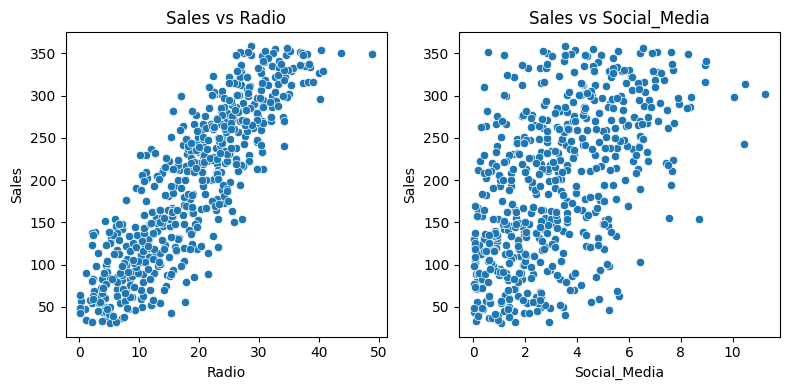

In [166]:
fig, axes = plt.subplots(1, 2, figsize = (8,4))
sns.scatterplot(x = data['Radio'], y = data['Sales'], ax=axes[0])
axes[0].set_title('Sales vs Radio')

sns.scatterplot(x = data['Social_Media'], y = data['Sales'], ax=axes[1])
axes[1].set_title('Sales vs Social_Media')

plt.tight_layout()


**Observation:** There is a clear linear relationship in the scatterplot between `Radio` and `Sales`

#### 2. Normality nature of residuals

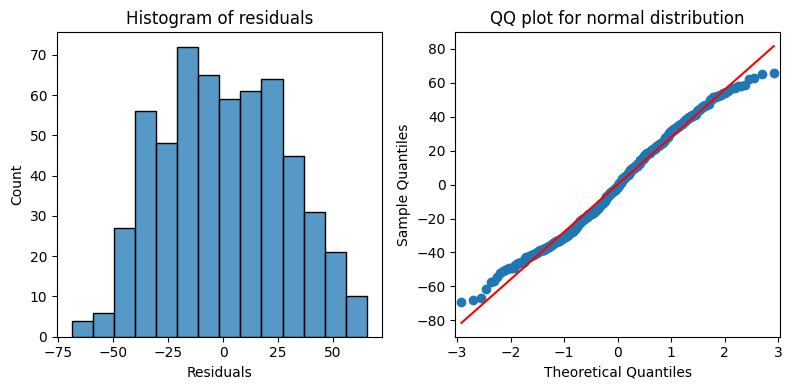

In [175]:
residuals = model.resid
fig, axes = plt.subplots(1, 2, figsize = (8,4))

sns.histplot(residuals, ax = axes[0])
axes[0].set_title('Histogram of residuals')
axes[0].set_xlabel('Residuals')

sm.qqplot(residuals, line='s', ax = axes[1])
axes[1].set_title('QQ plot for normal distribution')

plt.tight_layout()

**Observation:** The residuals in the Q-Q plot form a straight line, which valid for normal variable

#### 3. Independency

Each marketing promotion is independent from one another, the independence assumption is not violated.

#### 4. Homopseudocity

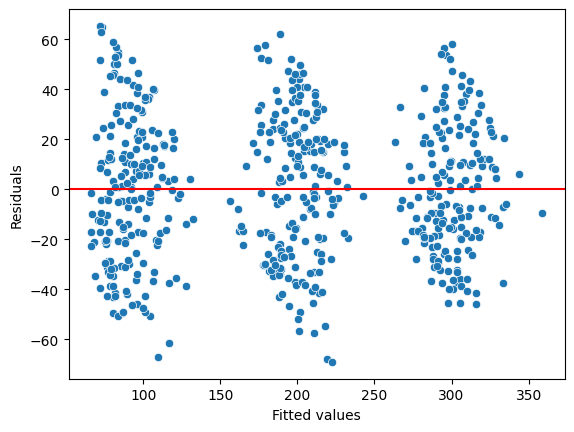

In [180]:
sns.scatterplot(x = model.fittedvalues, y = model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(0, color='red')

**Observation:** It appears to be the variance of residuals are having constant variance, and the fitted values are in three groups because the categorical variable is dominating in this model, meaning that `TV` is the biggest factor that decides the sales

#### 5. Multicollinearity

Among `TV` and `Radio`, only `Radio` is continuous. Hence, the assumption is met.

In [185]:
# But what if,  the model used both Radio and Social media as its predictor variable

# Calculate variance inflation factor between radio and social_media

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the data with the continous independent variables. 
X = data[['Radio','Social_Media']]

# Calculate the variance inflation factor for each variable.
vif = []

# Iterate through each column in X
for i in range(X.shape[1]):
    # Calculate VIF for each variable and append to the list
    vif.append(variance_inflation_factor(X.values, i))

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
Radio,4.93238
Social_Media,4.93238


## Step 4: Results and evaluation

In [186]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Thu, 30 Nov 2023   Prob (F-statistic):          1.61e-287
Time:                        14:47:55   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation:** 

When `TV` and `Radio` are used to predict `Sales`, the model coefficients are:

* $\beta_{0} =  217.6367$
* $\beta_{TVLow}= -152.0897$
* $\beta_{TVMedium} = -73.4835$
* $\beta_{Radio} =  2.8864$

Therefore, the equation is expressed as:

$\text{Sales} = \beta_{0} + \beta_{TVLow}*X_{TVLow}+ \beta_{TVMedium}*X_{TVMedium}+ \beta_{Radio}*X_{Radio}$


## Conclusion

The default TV category for the model is `High` since there are coefficients for the other two TV categories, `Medium` and `Low`. 


High TV promotional budgets have a substantial positive influence on sales. The model estimates that switching from a `high` to `medium` TV promotional budget reduces sales by  $\$75.3120$ million (95% CI  [−80.530	,−66.437]) , and switching from a high to low TV promotional budget reduces sales by  $\$152.0897$ million (95% CI  [−163.979,−144.616]). The model also estimates that an increase of  $\$1$ million in the radio promotional budget will yield a  $\$2$.9669 million increase in sales (95% CI [2.551,3.383]).

Thus, it is recommended that the business allot a high promotional budget to TV when possible and invest in radio promotions to increase sales.